In [1]:
import pandas as pd

# Load the dataset
file_path = 'Raw DataSet.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values (if any)
data = data.dropna()  # For simplicity, dropping rows with missing values

# Encoding categorical variables
categorical_columns = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X = data_encoded.drop('MonthlyCharges', axis=1)
y = data_encoded['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Pre-processed Dataset", dataframe=pd.DataFrame(X_train_scaled))

# Display the first few rows of the scaled training data
pd.DataFrame(X_train_scaled).head()


,0,1,2,3,4,5,6,7,8,9
0,-0.437749,-0.465683,-1.025166,1.532186,0.329573,-0.860523,-0.887057,1.910109,-0.558353,-0.601271
1,-0.437749,0.885537,-1.025166,-0.652662,0.329573,1.162083,1.127324,-0.523530,1.790982,-0.601271
2,-0.437749,-1.284605,0.975452,-0.652662,-3.034225,-0.860523,-0.887057,-0.523530,-0.558353,1.663142
3,-0.437749,-1.161766,0.975452,-0.652662,0.329573,-0.860523,1.127324,-0.523530,-0.558353,1.663142
4,-0.437749,-1.325551,0.975452,1.532186,0.329573,1.162083,-0.887057,-0.523530,1.790982,-0.601271


In [3]:
# Create the pre-processed, training, and testing datasets for download
pre_processed_path = 'pre_processed_dataset.csv'
training_set_path = 'training_set.csv'
testing_set_path = 'testing_set.csv'

# Saving the pre-processed dataset
data_encoded.to_csv(pre_processed_path, index=False)

# Saving the training set
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
training_set = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
training_set.to_csv(training_set_path, index=False)

# Saving the testing set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
testing_set = pd.concat([X_test_scaled_df, y_test.reset_index(drop=True)], axis=1)
testing_set.to_csv(testing_set_path, index=False)

pre_processed_path, training_set_path, testing_set_path


('pre_processed_dataset.csv', 'training_set.csv', 'testing_set.csv')

In [4]:
# Get the number of samples in the original dataset
total_samples = data_encoded.shape[0]

# Get the number of samples in the training and testing sets
training_samples = X_train.shape[0]
testing_samples = X_test.shape[0]

total_samples, training_samples, testing_samples


(7043, 5634, 1409)

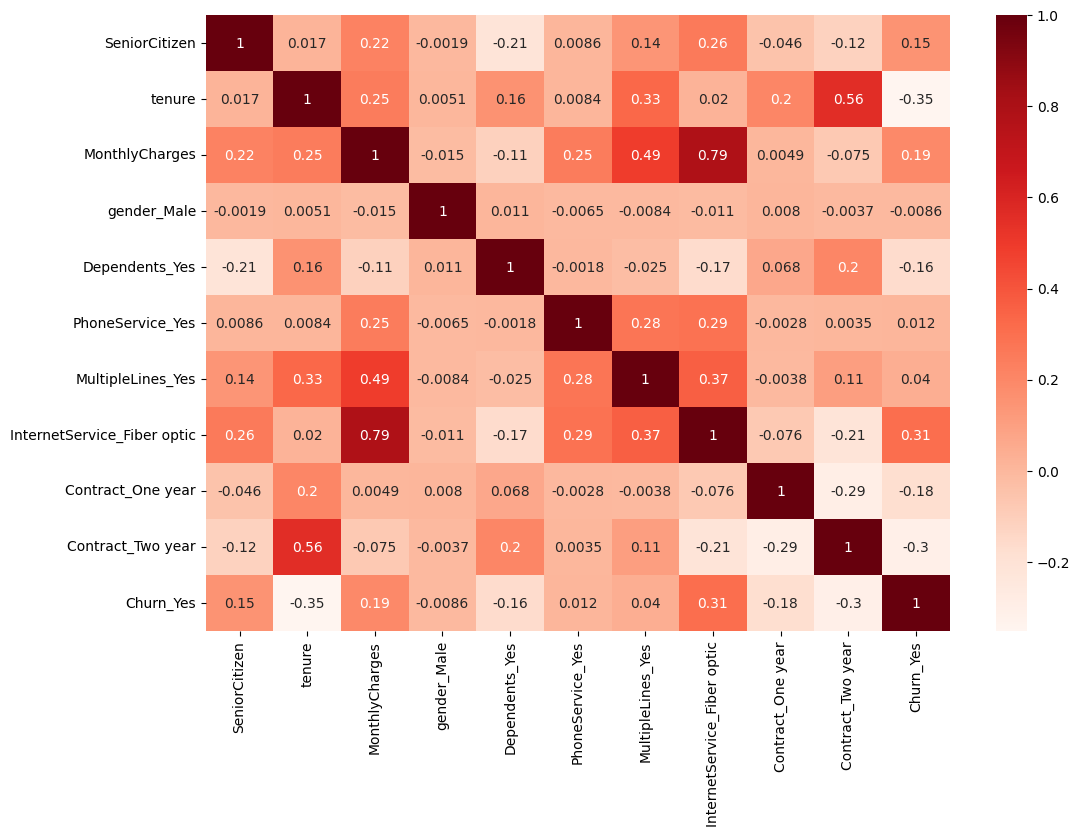

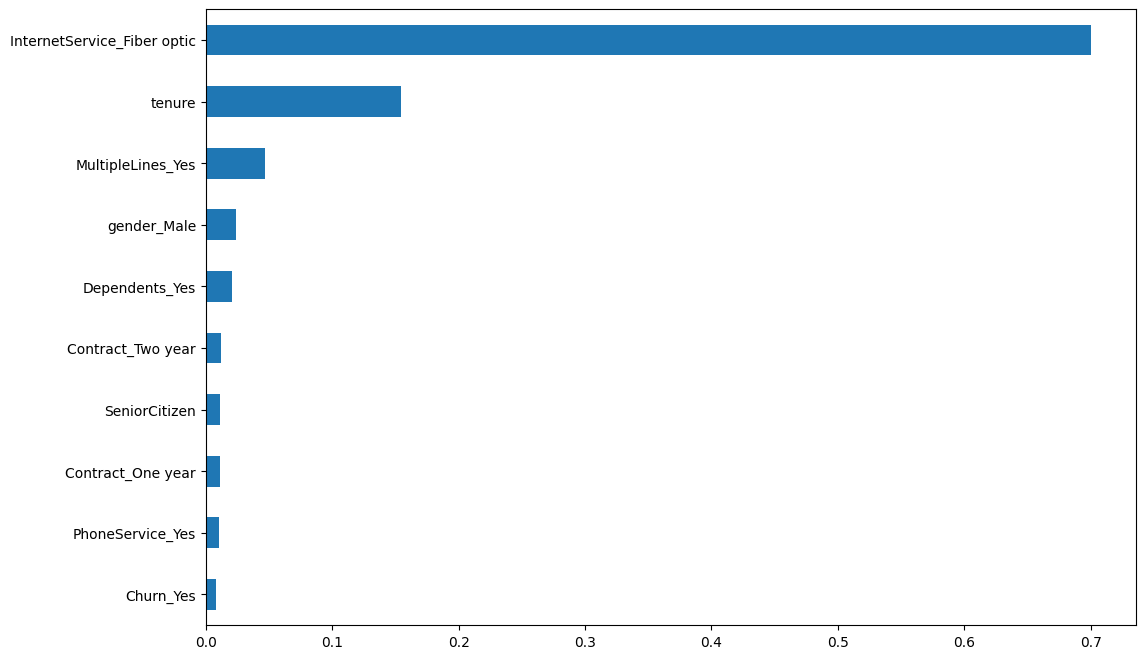

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.437749,-0.465683,-1.025166,1.532186,0.329573,-0.860523,-0.887057,1.910109,-0.558353,0.203853,...,-0.283606,-0.292350,0.629521,-0.184018,0.763333,-1.643693,0.480476,-1.694375,0.495291,-1.066514
1,-0.437749,0.885537,-1.025166,-0.652662,0.329573,1.162083,1.127324,-0.523530,1.790982,-0.387643,...,0.382992,0.371536,-0.172542,0.590260,1.310044,-0.608386,2.081271,-0.590188,2.019017,-0.937634
2,-0.437749,-1.284605,0.975452,-0.652662,-3.034225,-0.860523,-0.887057,-0.523530,-0.558353,0.562335,...,2.611022,2.691530,1.588509,1.694168,0.763333,0.450510,0.480476,0.464401,0.495291,0.292315
3,-0.437749,-1.161766,0.975452,-0.652662,0.329573,-0.860523,1.127324,-0.523530,-0.558353,0.508562,...,-0.283606,0.371536,-0.172542,-0.184018,-0.970088,0.450510,0.480476,-0.590188,-0.629444,0.292315
4,-0.437749,-1.325551,0.975452,1.532186,0.329573,1.162083,-0.887057,-0.523530,1.790982,0.580259,...,0.382992,-0.292350,-0.172542,0.590260,-1.030834,-0.608386,2.081271,0.464401,-1.588703,-0.937634


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Identify highly correlated features
threshold = 0.75
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
                   if i != j and correlation_matrix.loc[i, j] > threshold]

# Train a RandomForest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.sort_values().plot(kind='barh')
plt.show()

# Selecting important features
selected_features = feature_importances[feature_importances > 0.01].index
X_train_selected = X_train_scaled[:, feature_importances > 0.01]
X_test_selected = X_test_scaled[:, feature_importances > 0.01]

#import ace_tools as tools; tools.display_dataframe_to_user(name="Selected Features", dataframe=pd.DataFrame(X_train_selected))

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

#tools.display_dataframe_to_user(name="Polynomial Features", dataframe=pd.DataFrame(X_train_poly))

# Display the first few rows of the generated polynomial features
pd.DataFrame(X_train_poly).head()


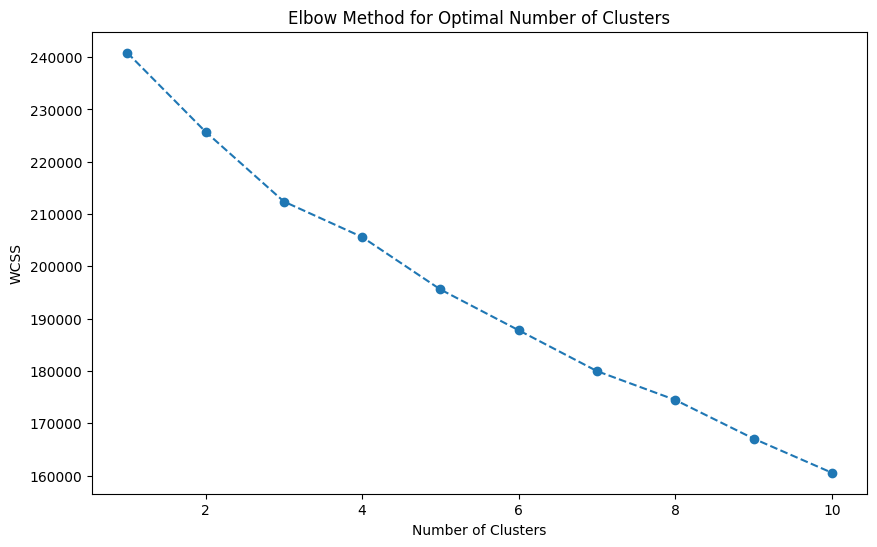

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_poly)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


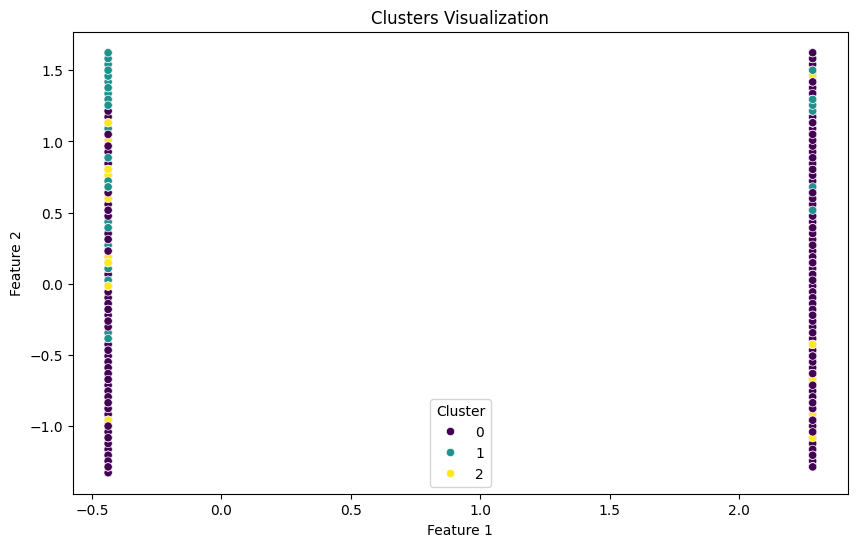

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Train the K-Means clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train_poly)

# Add the cluster labels to the dataset
X_train_clustered = pd.DataFrame(X_train_poly)
X_train_clustered['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_clustered, x=0, y=1, hue='Cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Clustered Dataset", dataframe=X_train_clustered)


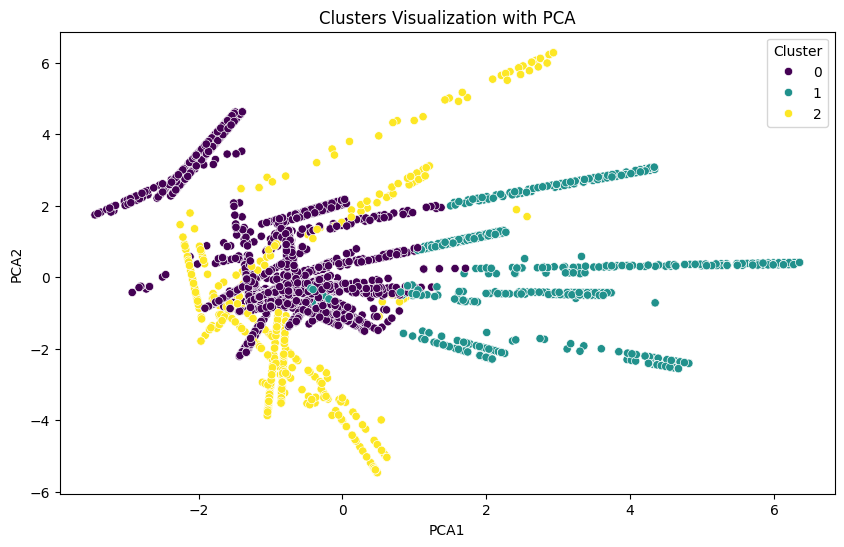

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_poly)

# Add the cluster labels to the PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
X_train_pca_df['Cluster'] = clusters

# Visualize the clusters in the PCA-transformed space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [9]:
import numpy as np

# Retrieve the centroids of the clusters
centroids = kmeans.cluster_centers_

# No need to apply PCA inverse transform as centroids are already in the original feature space
centroids_df = pd.DataFrame(centroids, columns=[f'Feature{i+1}' for i in range(centroids.shape[1])])

# Add cluster labels
centroids_df['Cluster'] = [0, 1, 2]

centroids_df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Cluster
0,0.064989,-0.302968,-0.005397,-0.110351,0.329573,-0.005361,0.193794,0.127877,-0.447857,0.079053,...,0.063869,0.042145,-0.147602,0.368883,0.056784,-0.067519,-0.142106,-0.163104,-0.129248,0
1,-0.251117,1.215712,0.003555,0.442972,0.329573,0.486561,-0.291226,-0.523530,1.790982,-0.260577,...,-0.095980,-0.172542,0.590260,0.161035,-0.254729,0.871421,0.152466,-0.521581,-0.937634,1
2,-0.013644,-0.019727,0.033132,-0.007499,-3.034225,-0.860523,-0.887057,0.027565,-0.017835,-0.009555,...,2.691530,-0.083639,0.054117,0.763333,-0.023721,0.015348,-0.024452,0.015821,-0.298368,2


<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


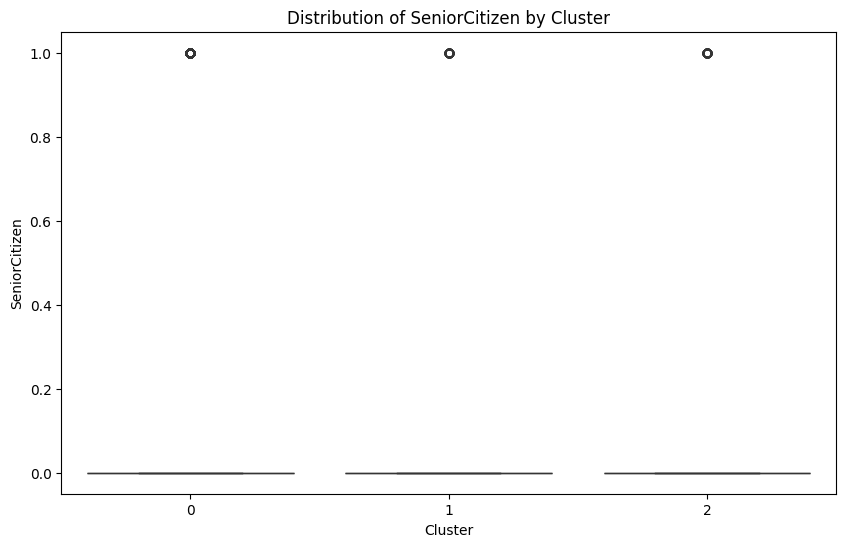

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


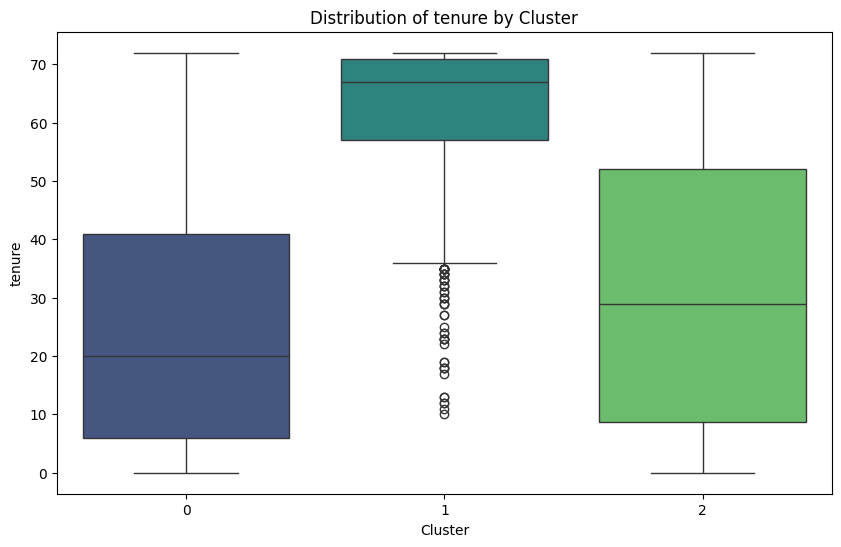

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


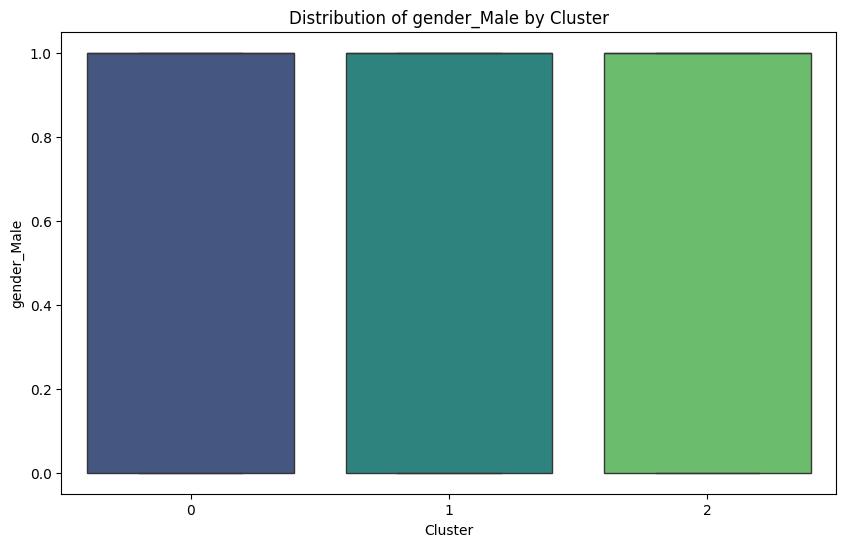

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


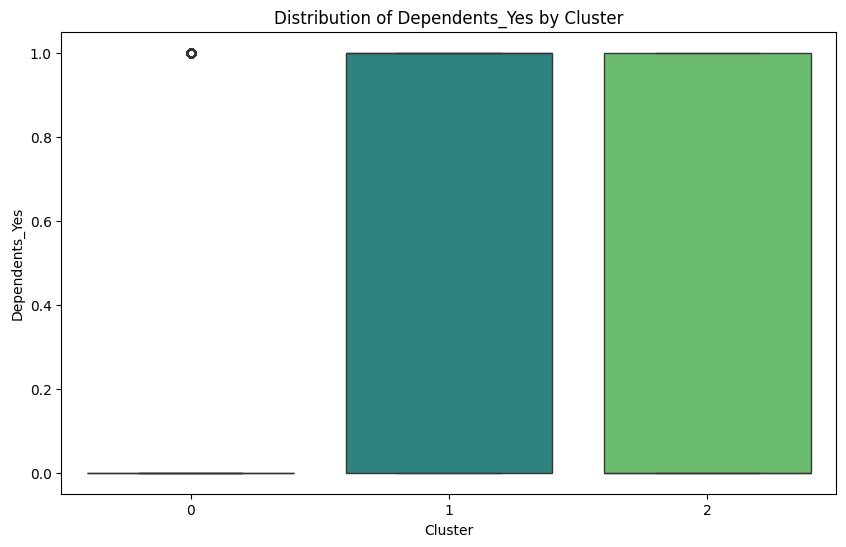

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


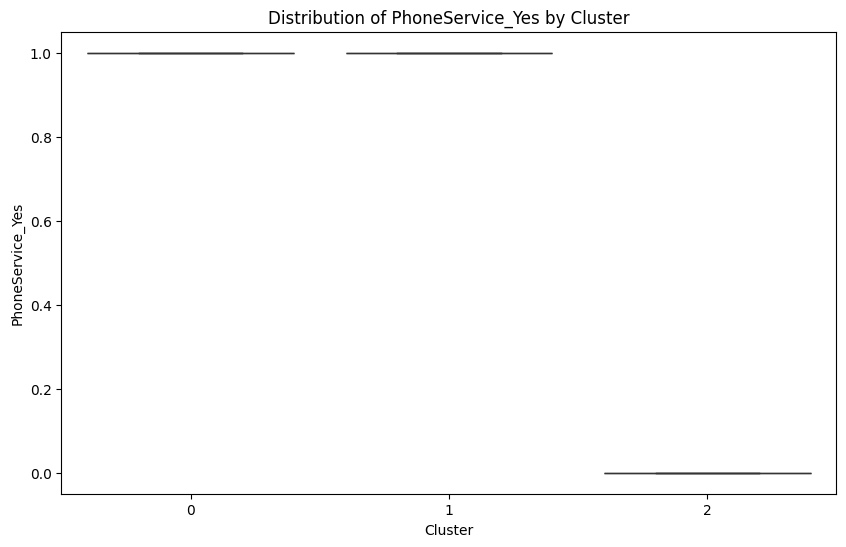

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


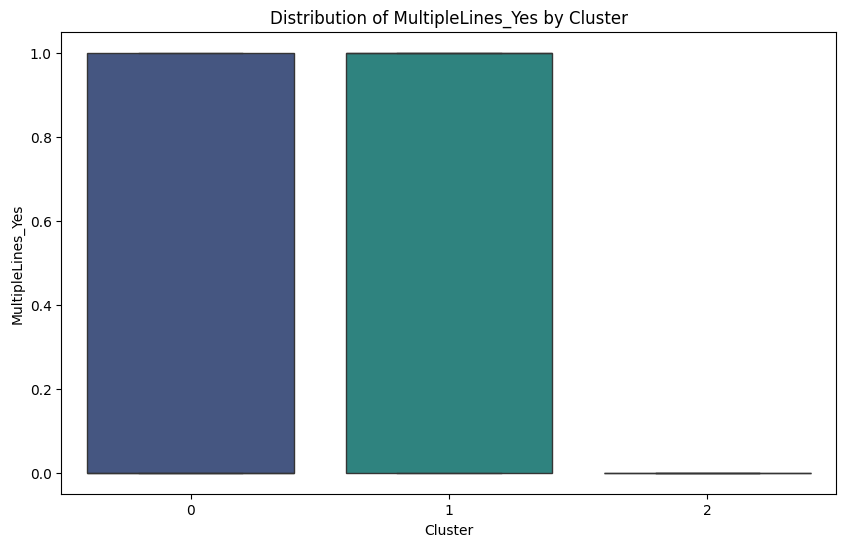

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


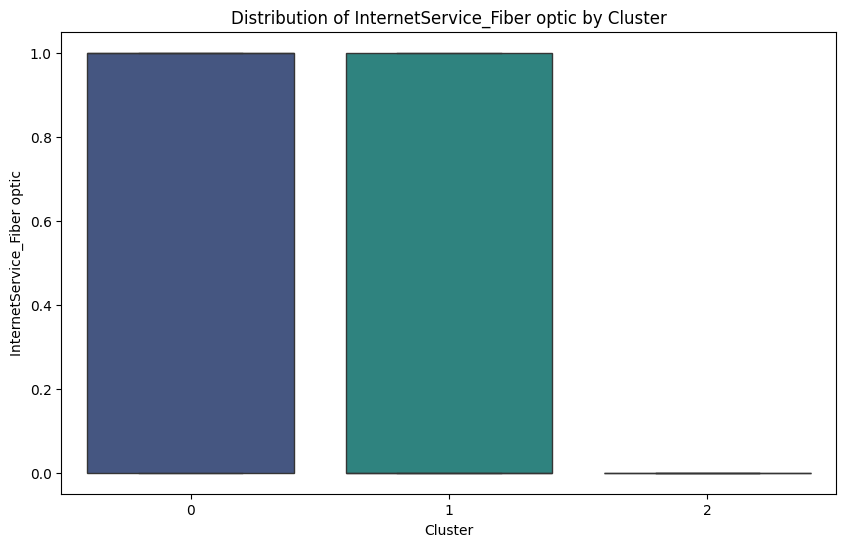

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


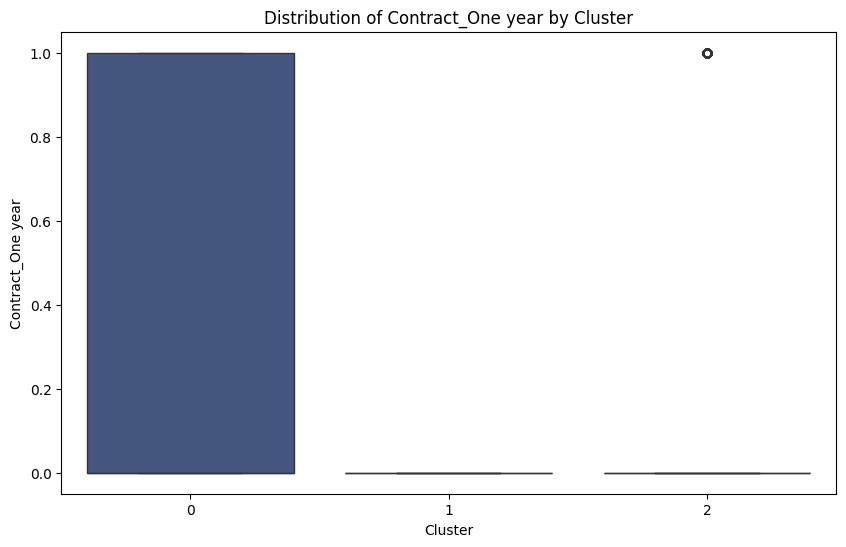

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


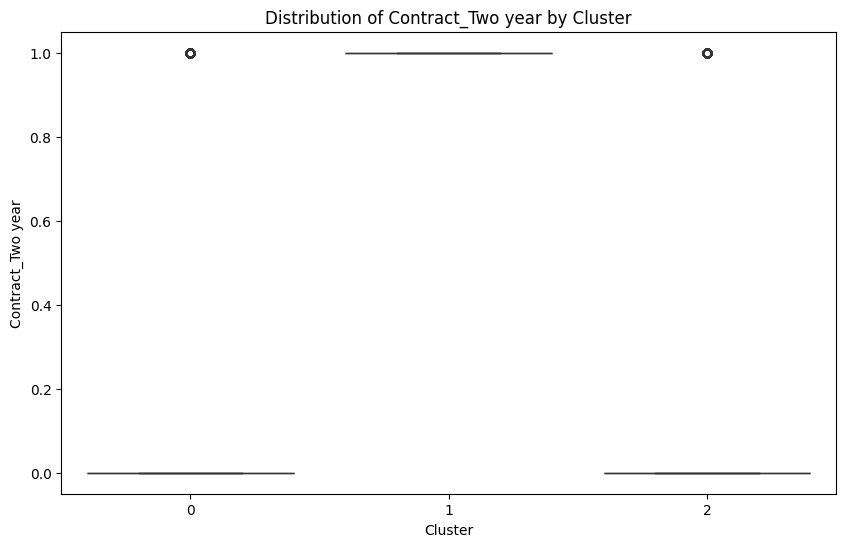

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


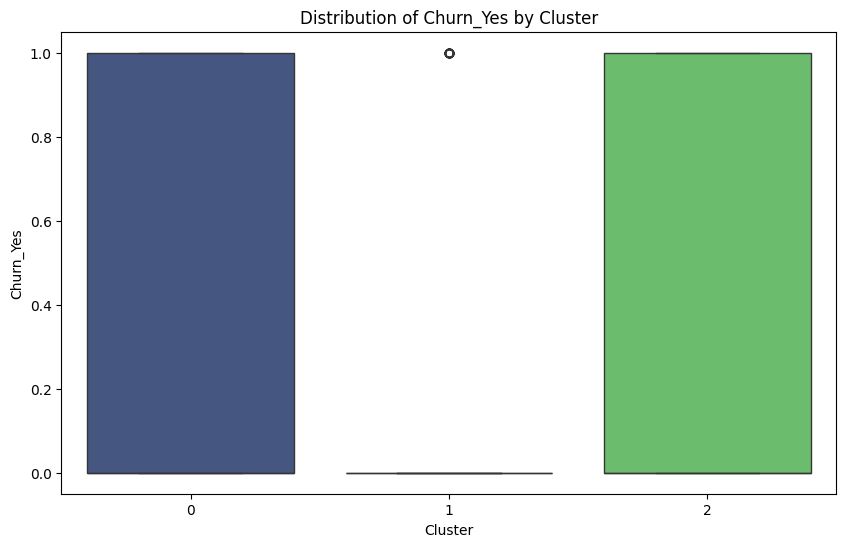

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the original features and cluster labels
X_train_original_df = pd.DataFrame(X_train, columns=X.columns)
X_train_original_df['Cluster'] = clusters

# Visualize the distribution of key features within each cluster
for feature in X_train_original_df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


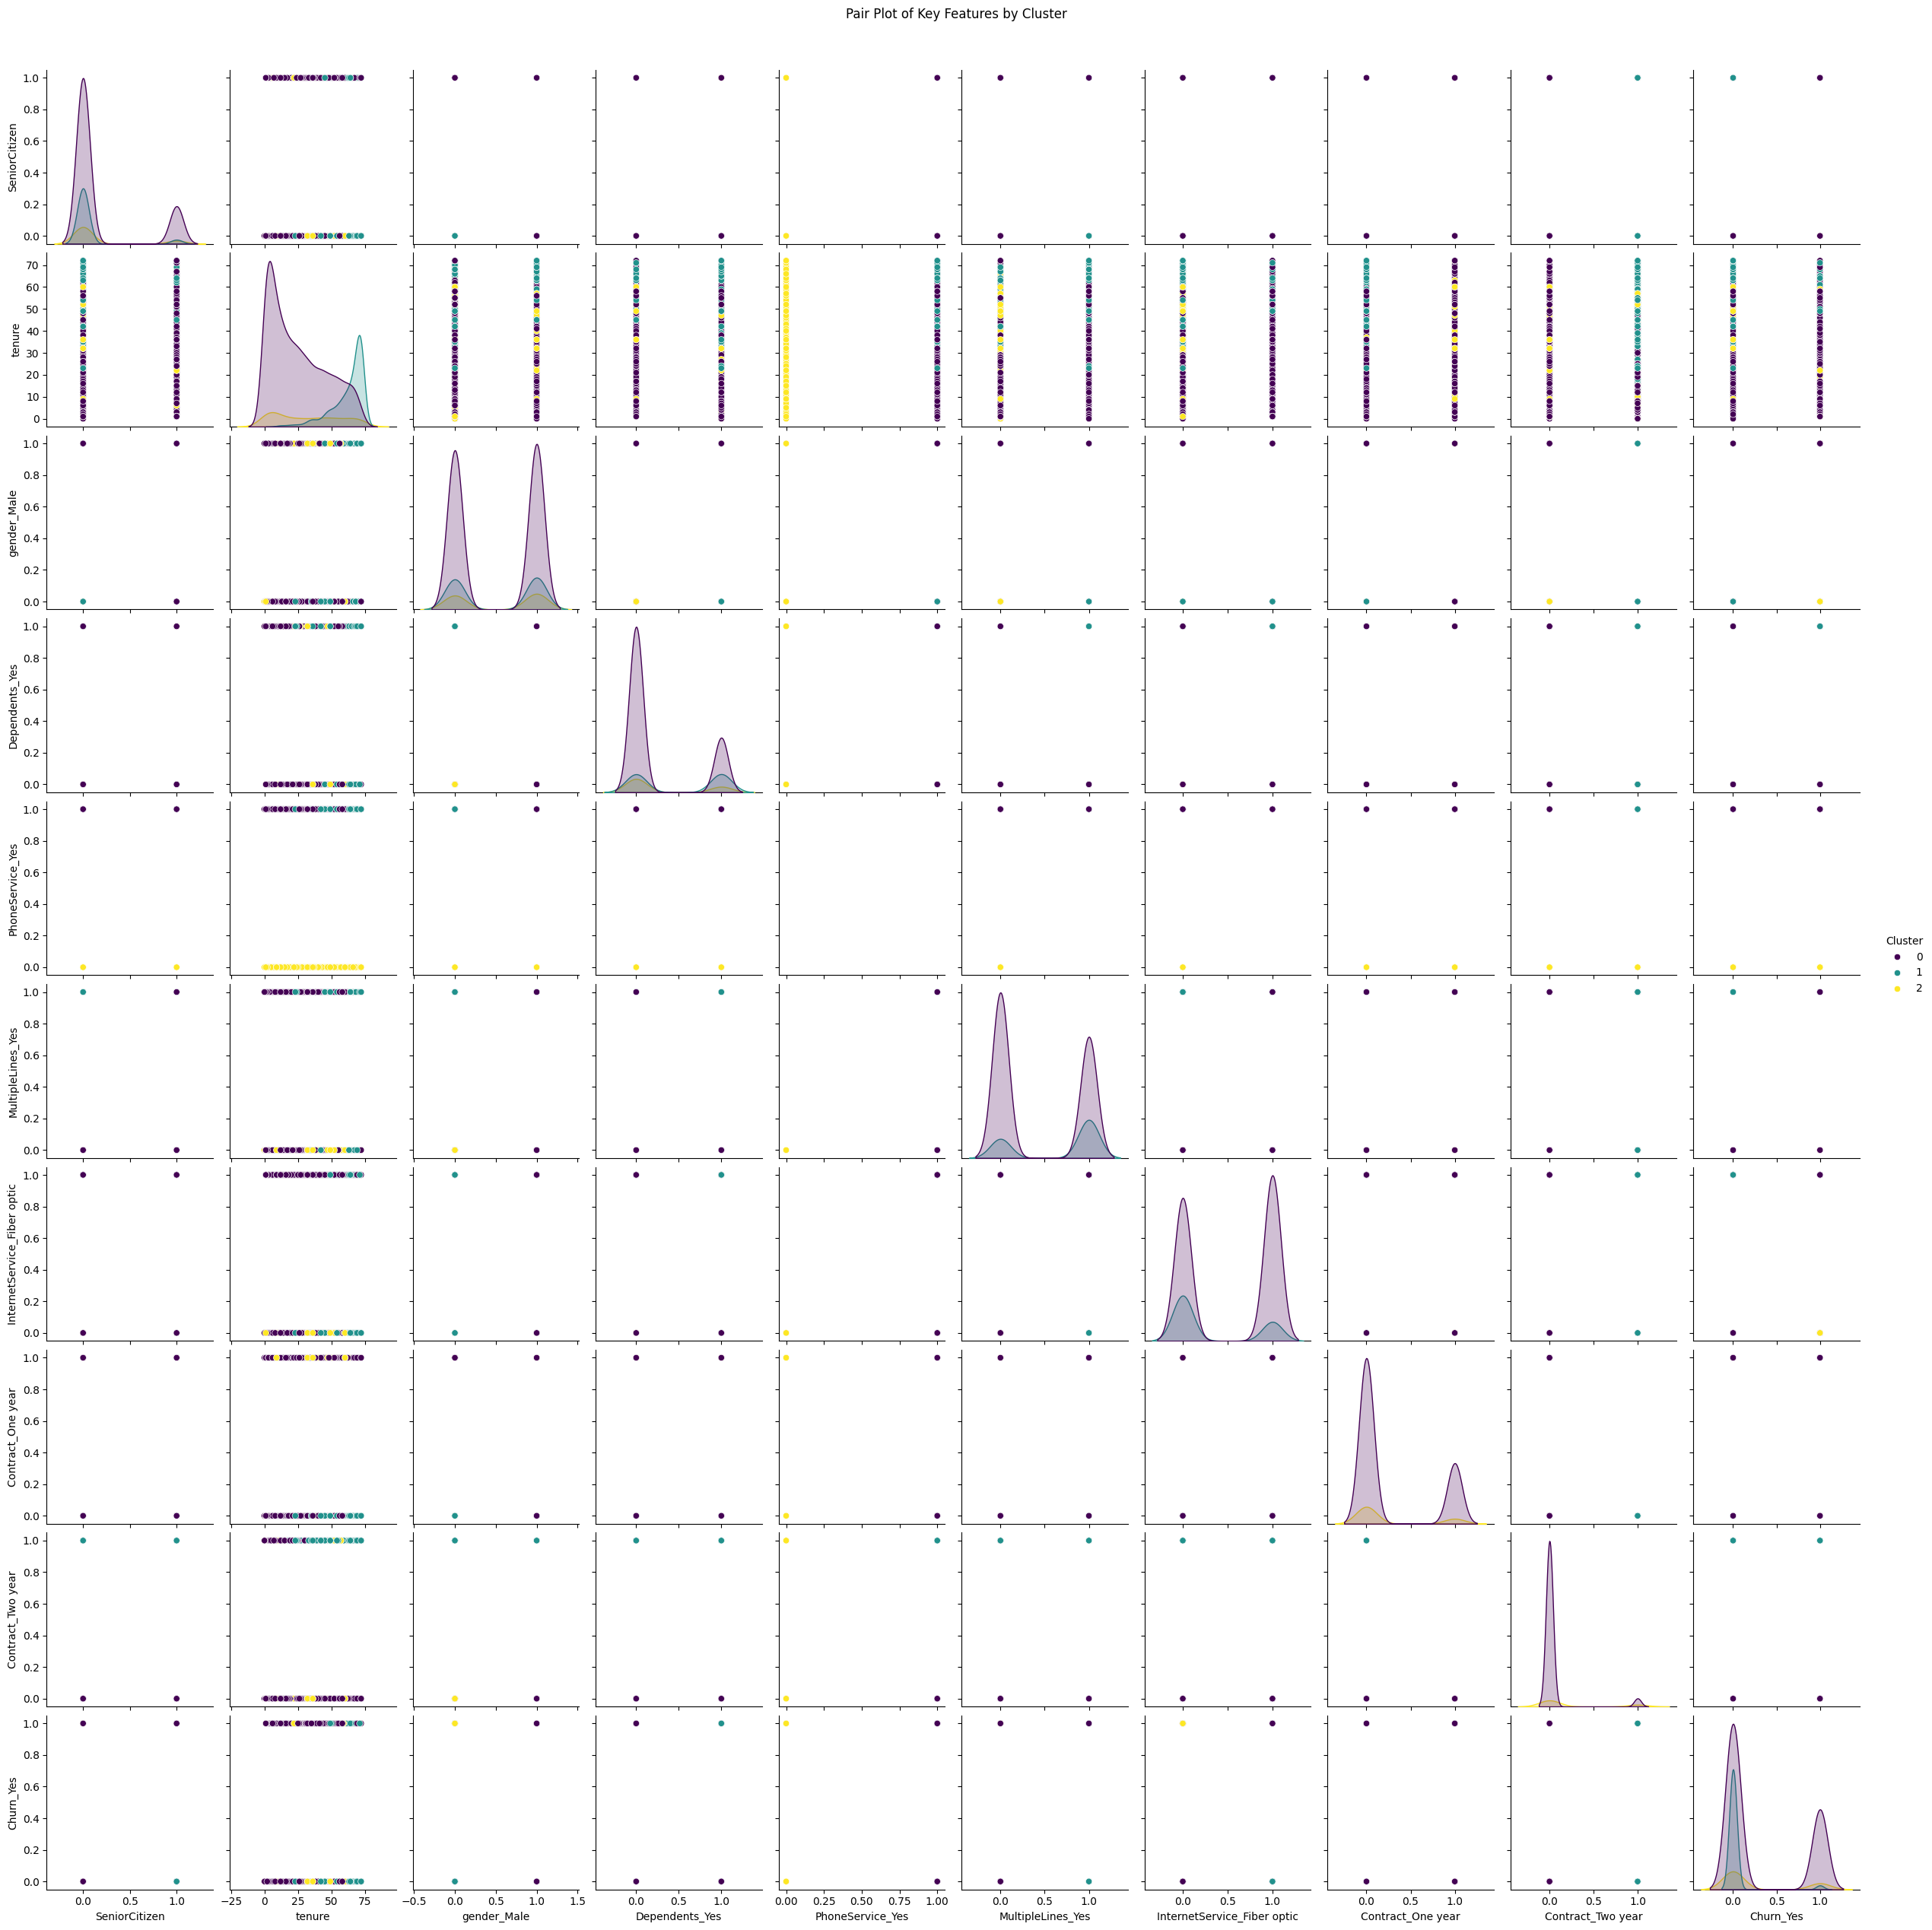

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot of the key features colored by cluster
sns.pairplot(X_train_original_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()


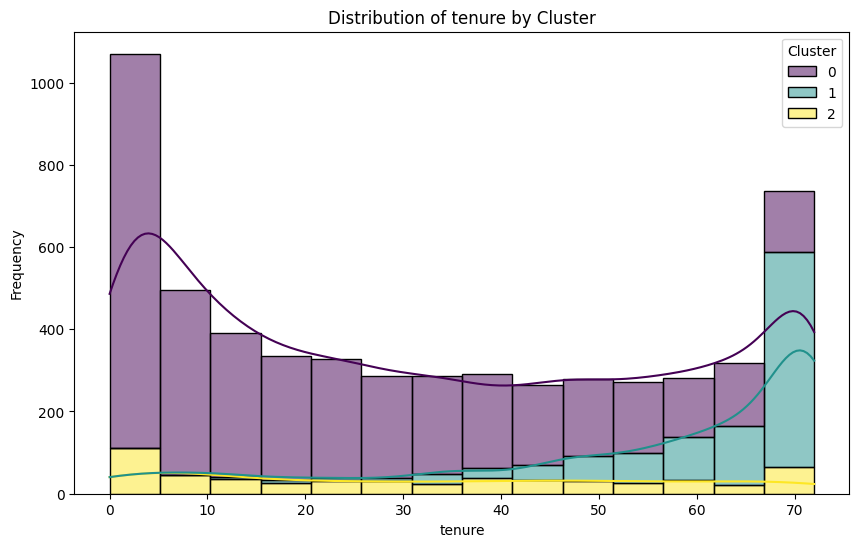

<Figure size 1000x600 with 0 Axes>

In [12]:
# List of key features to visualize
key_features = ['tenure', 'MonthlyCharges']  # Verify if 'MonthlyCharges' is the correct column name

for feature in key_features:
    plt.figure(figsize=(10, 6))
    # Check if the feature exists in the DataFrame before plotting
    if feature in X_train_original_df.columns:
        sns.histplot(data=X_train_original_df, x=feature, hue='Cluster', multiple='stack', palette='viridis', kde=True)
        plt.title(f'Distribution of {feature} by Cluster')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")

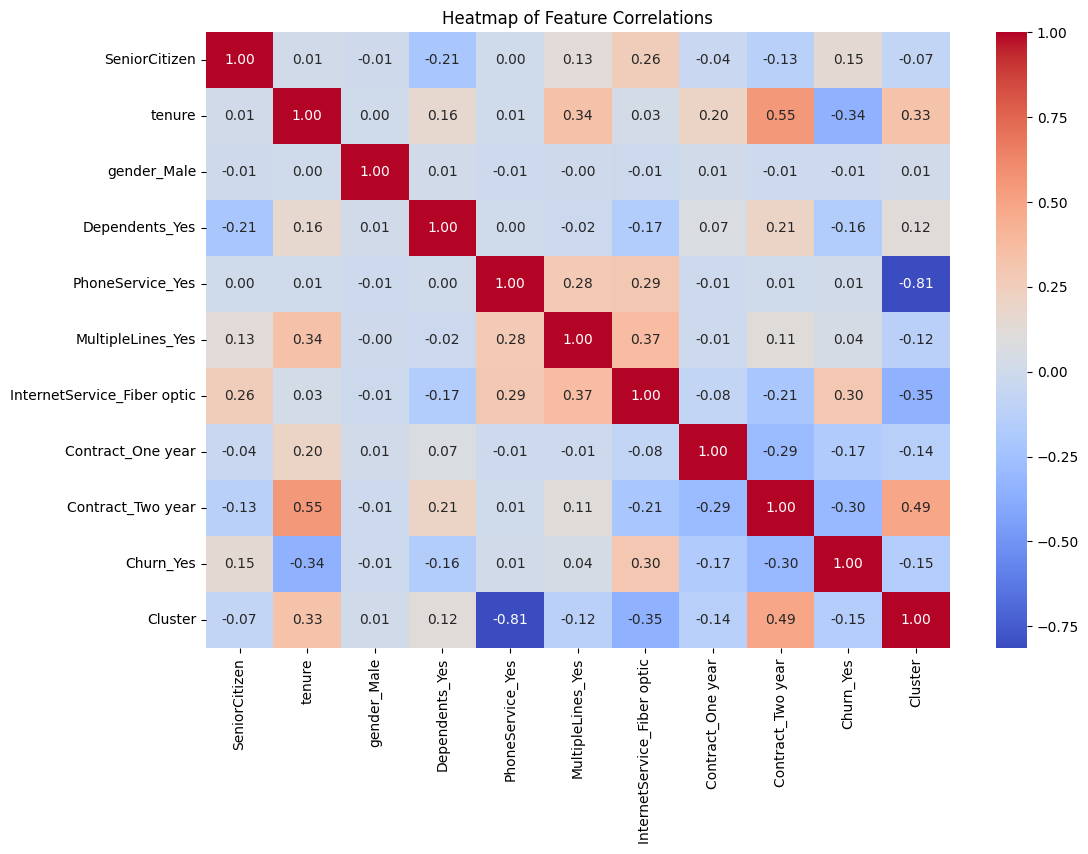

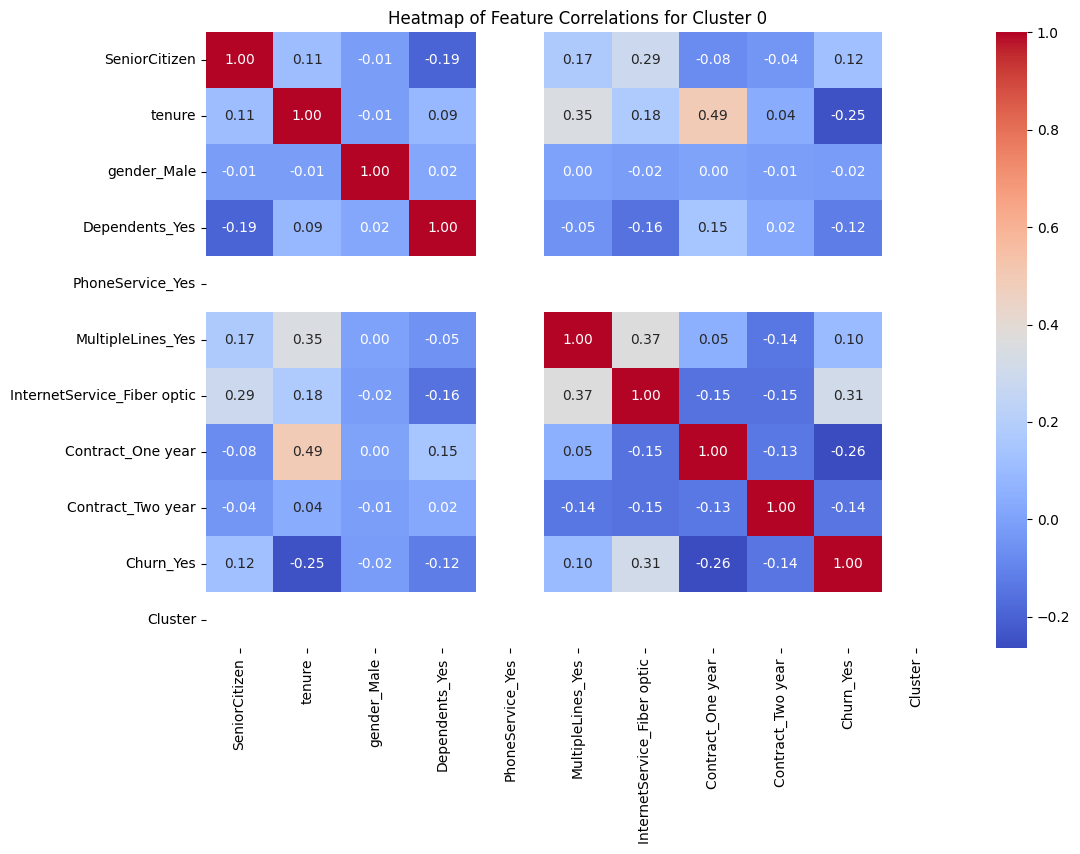

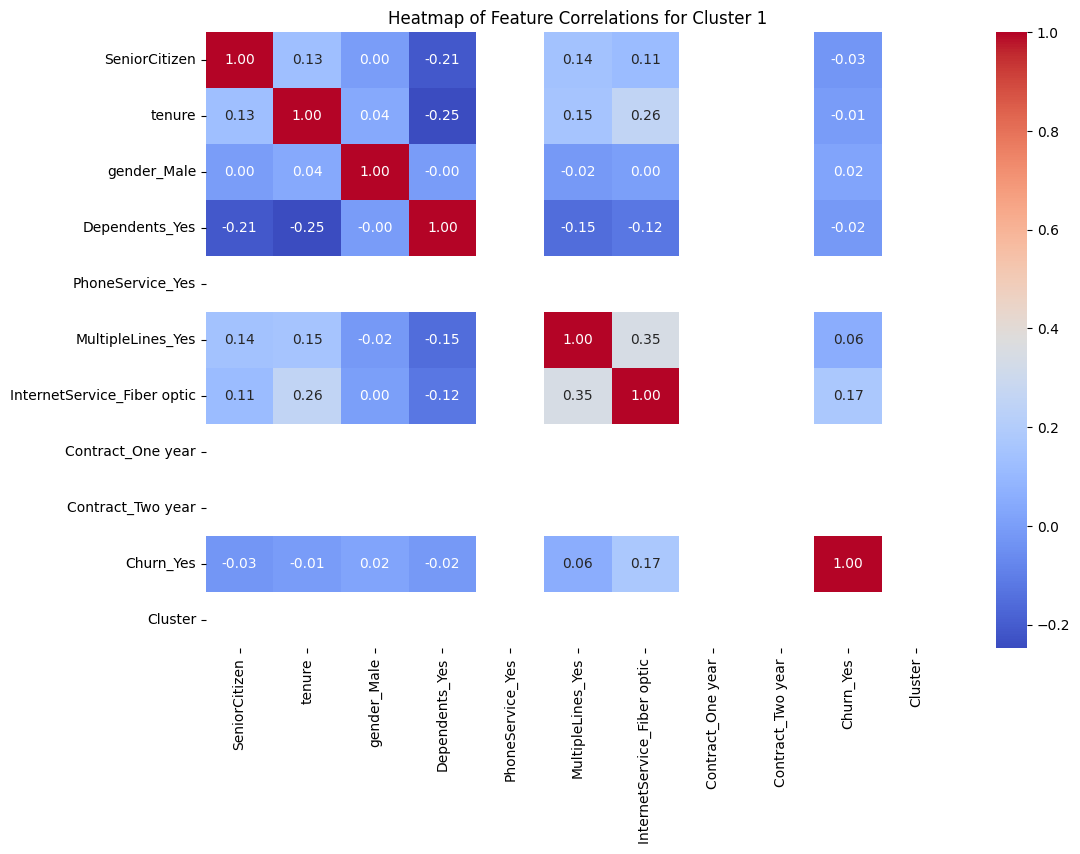

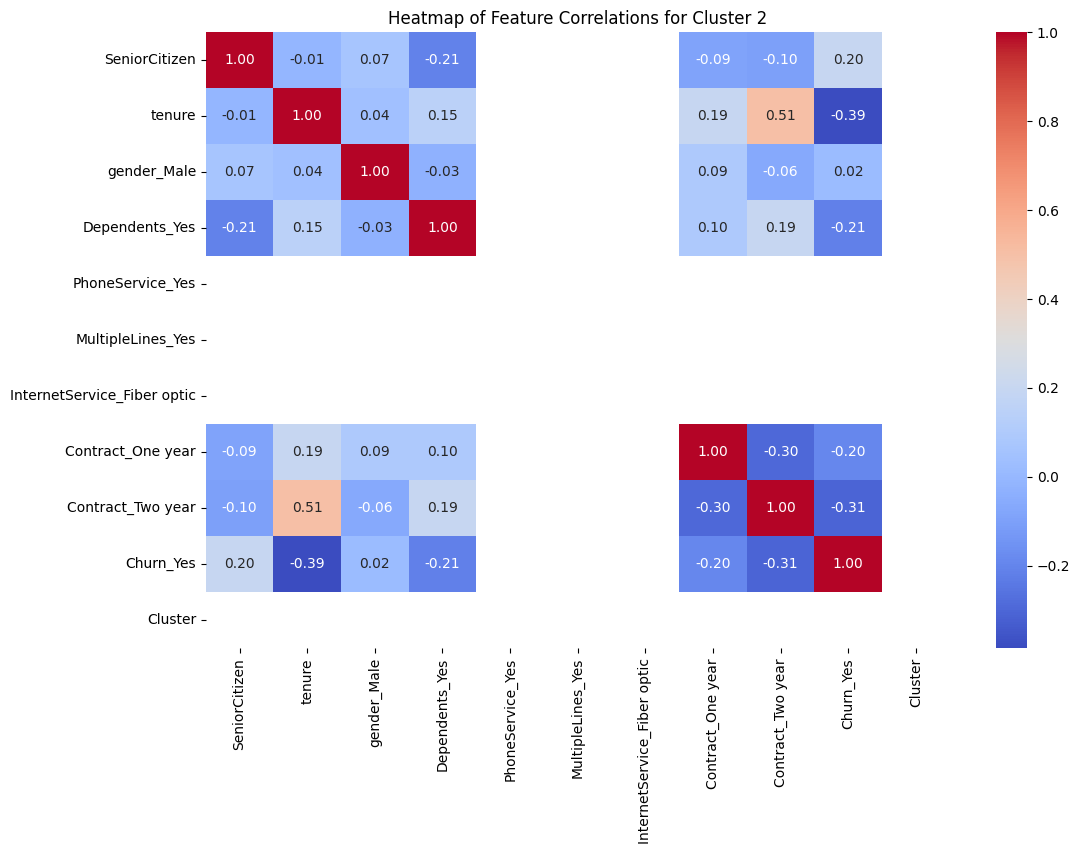

In [13]:
# Create a heatmap for the entire dataset to see the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_original_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

# Create heatmaps for each cluster to see the correlation within clusters
for cluster in X_train_original_df['Cluster'].unique():
    plt.figure(figsize=(12, 8))
    sns.heatmap(X_train_original_df[X_train_original_df['Cluster'] == cluster].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap of Feature Correlations for Cluster {cluster}')
    plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

dataset = pd.read_csv('Raw DataSet.csv')
# Preprocessing
categorical_features = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract']
numeric_features = ['tenure', 'MonthlyCharges']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separate features and target variable
X = dataset.drop('Churn', axis=1)
y = dataset['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4947 - accuracy: 0.7495 - val_loss: 0.4163 - val_accuracy: 0.8030
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7870 - val_loss: 0.4110 - val_accuracy: 0.8030
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7883 - val_loss: 0.4098 - val_accuracy: 0.8039
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7899 - val_loss: 0.4089 - val_accuracy: 0.8004
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.7917 - val_loss: 0.4087 - val_accuracy: 0.8030
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7914 - val_loss: 0.4077 - val_accuracy: 0.8075
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.7897 - val_loss: 0.4163 - val_accuracy: 0.7995
Epoch 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict churn on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

print(classification_report_output)
print(confusion_matrix_output)


45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

[[963  73]
 [209 164]]
